# MODULE 5

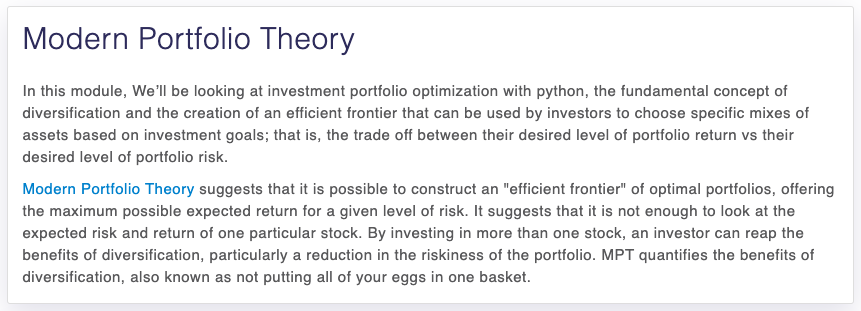

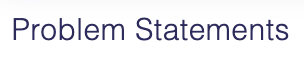

In [709]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5.1

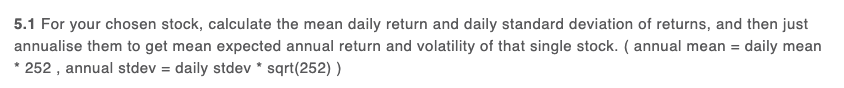

In [710]:
#importing the file
ds = pd.read_csv('AAPL (1).csv')

In [711]:
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


In [712]:
#Addition of new attribute 'Day_Perc_Change'
ds['Daily_return']=ds['Close Price'].pct_change().fillna(0)

In [713]:
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Daily_return
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M,0.000000
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M,-0.001642
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M,-0.013241
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M,0.002292
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M,-0.017047


In [714]:
Mean_daily_return=ds['Daily_return'].mean()
print('Mean Daily return',Mean_daily_return)

Mean Daily return -0.0007277674881734065


In [715]:
Std_daily_return=ds['Daily_return'].std()
print('Daily Standard deviation of return',Std_daily_return)

Daily Standard deviation of return 0.017536759854612154


In [716]:
Annual_return=Mean_daily_return*252
print('Expected Annual Return',Annual_return)

Expected Annual Return -0.18339740701969842


In [717]:
Annual_std=Std_daily_return*(252)**0.5
print('Standard deviation of Annual Return',Annual_std)

Standard deviation of Annual Return 0.27838743226298995


## 5.2

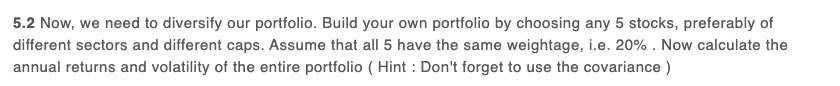

In [718]:
ds1 = pd.read_csv('PVR.csv') #SC

In [719]:
ds2 = pd.read_csv('LEMONTREE.csv') #SC

In [720]:
ds3 = pd.read_csv('TITAN.csv') #MC

In [721]:
ds4 = pd.read_csv('PNB.csv') #MC

In [722]:
ds5 = pd.read_csv('RELIANCE.csv') #LC

In [723]:
# New Dataframe
df=pd.DataFrame()

In [724]:
# Daily return of each dataset in df
df['Daily_return1']=ds1['Close Price'].pct_change().fillna(0)
df['Daily_return2']=ds2['Close Price'].pct_change().fillna(0)
df['Daily_return3']=ds3['Close Price'].pct_change().fillna(0)
df['Daily_return4']=ds4['Close Price'].pct_change().fillna(0)
df['Daily_return5']=ds5['Close Price'].pct_change().fillna(0)

In [725]:
mean_daily_returns = df.mean()
cov_matrix = df.cov()
#weights of each stock
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
# Portfolio return
portfolio_return = np.sum(mean_daily_returns * weights) * 252
# Portfolio volatility
portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
print('Portfolio Annual return',portfolio_return)
print('Portfolio Volatility',portfolio_std_dev)

Portfolio Annual return 0.09983613516458083
Portfolio Volatility 0.1975394674140535


## 5.3

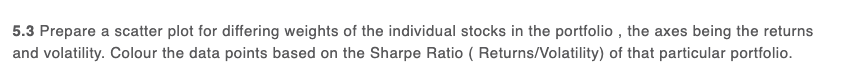

In [726]:
x_pr=[]
y_pv=[]
z_sr=[]
wts = 2000

for i in range(wts):
    weights = np.random.random(5)
    #rebalance weights sum to 1
    weights /= np.sum(weights)
    #Calculating return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    #store results in lists
    x_pr.append(portfolio_return)
    y_pv.append(portfolio_std_dev)
    #store Sharpe Ratio in list
    z_sr.append(x_pr[i]/y_pv[i])    

In [727]:
# New dataframe to store desired values of attributes 
df1=pd.DataFrame()
df1['PV']=y_pv
df1['PR']=x_pr
df1['SR']=z_sr

Text(0.5, 1.0, 'Returns VS Volatility for different weights')

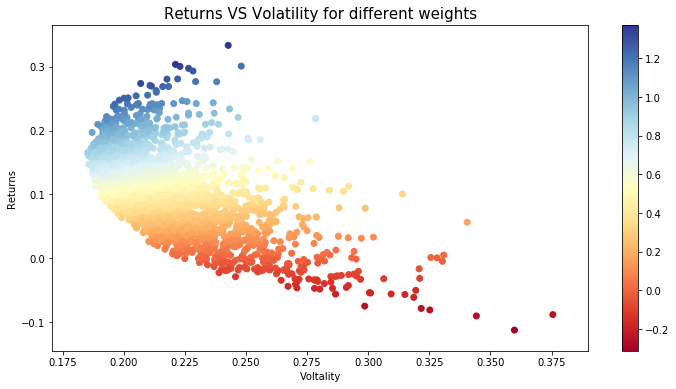

In [728]:
plt.figure(figsize=(12,6))
plt.scatter(df1['PV'],df1['PR'],c=df1['SR'],cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Voltality')
plt.ylabel('Returns')
plt.title('Returns VS Volatility for different weights',fontsize=15)

## 5.4

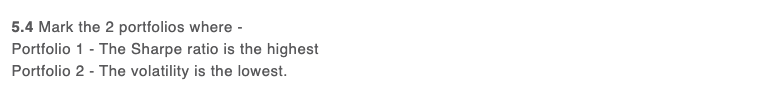

In [729]:
print('Lowest_volatility',min(y_pv))
print('Highest_sr',max(z_sr))

Lowest_volatility 0.1852485912654342
Highest_sr 1.37521176532168


In [730]:
# Index of desired values in the dataframe
max_sr=df1.iloc[df1['SR'].idxmax()]
min_pv=df1.iloc[df1['PV'].idxmin()]

Text(0.5, 1.0, 'MAX SP and MIN PV')

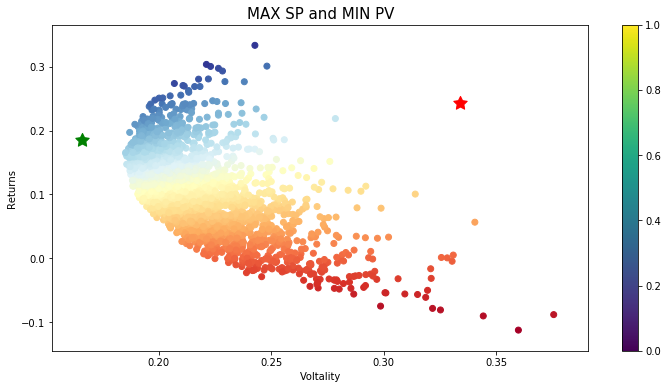

In [733]:
plt.figure(figsize=(12,6))
plt.scatter(df1['PV'],df1['PR'],c=df1['SR'],cmap='RdYlBu')
#red star for highest Sharpe Ratio
plt.scatter(max_sr[1],max_sr[0],marker=(5,1,0),color='r',s=200)
#green star for minimum variance portfolio
plt.scatter(min_pv[1],min_pv[0],marker=(5,1,0),color='g',s=200)
plt.colorbar()
plt.xlabel('Voltality')
plt.ylabel('Returns')
plt.title('MAX SP and MIN PV',fontsize=15)

# THANK YOU !